Importing the dependencies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [4]:
#Loading Dataset for wine quality prediction
wine_dataset = pd.read_csv('/content/winequality-red.csv')
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
wine_dataset.shape

(1599, 12)

In [6]:
# Checking Missing Values.
wine_dataset.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [7]:
# Data Analysis and Visualization.
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


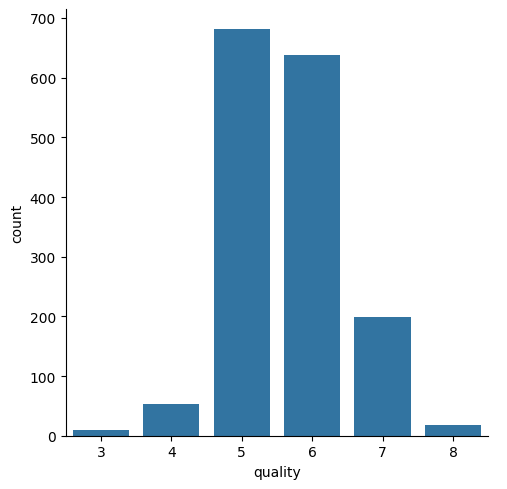

In [9]:
# No. of vlaues for each quality.
sns.catplot(x='quality', data=wine_dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

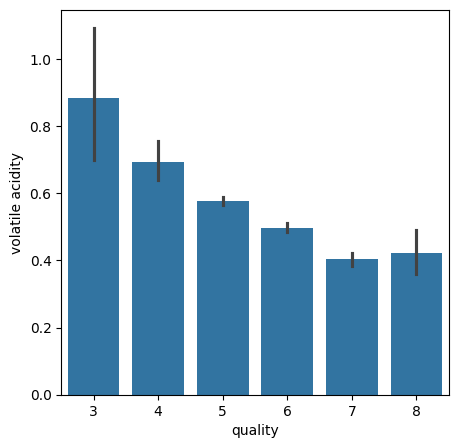

In [10]:
# Comapring Volatile acidity vs Quality
plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data=wine_dataset)

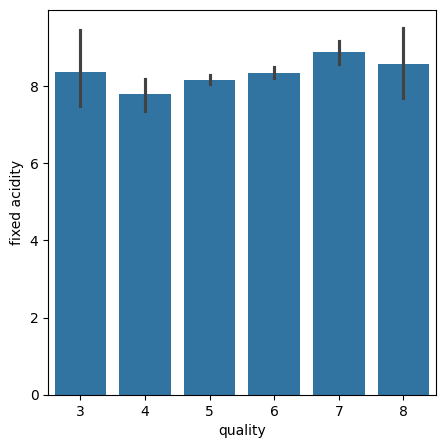

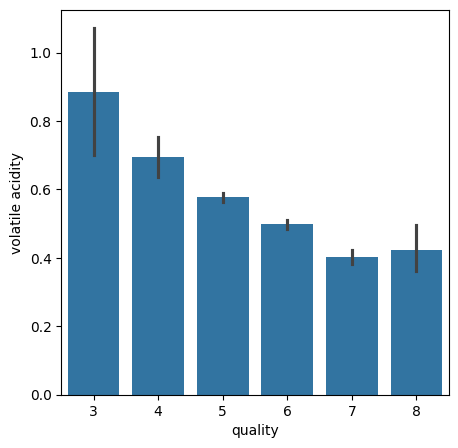

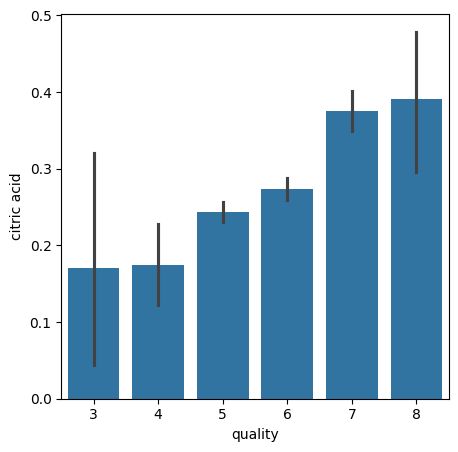

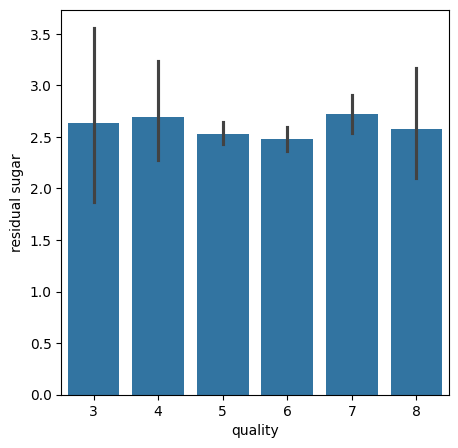

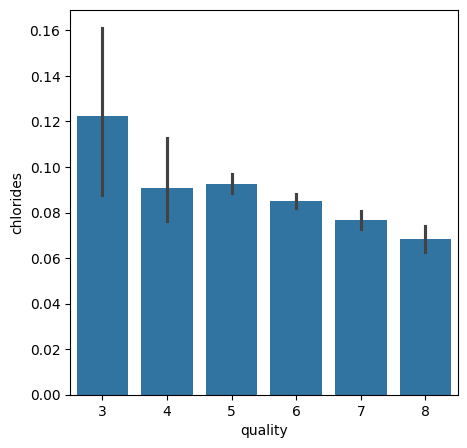

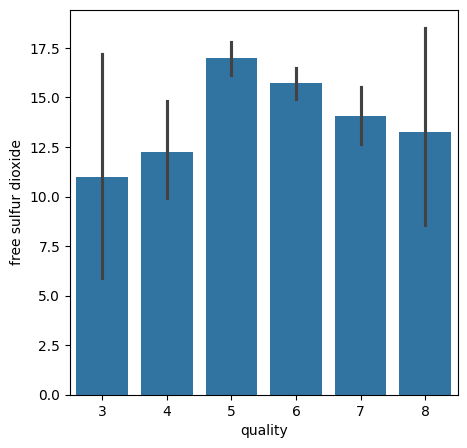

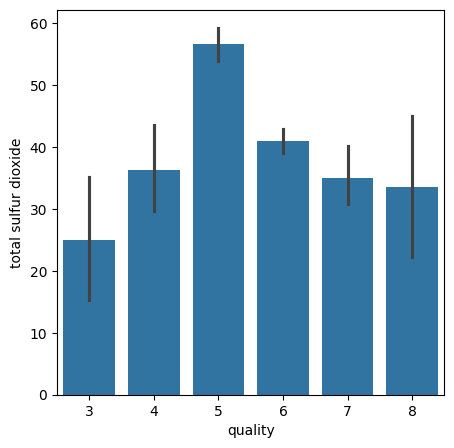

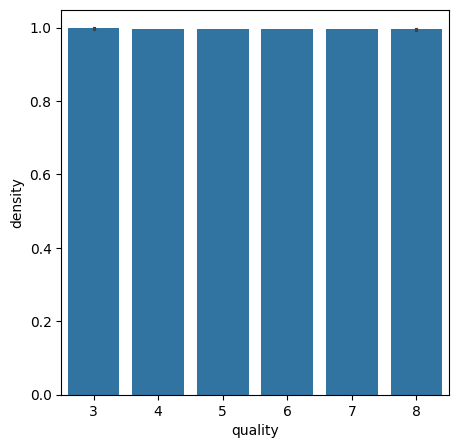

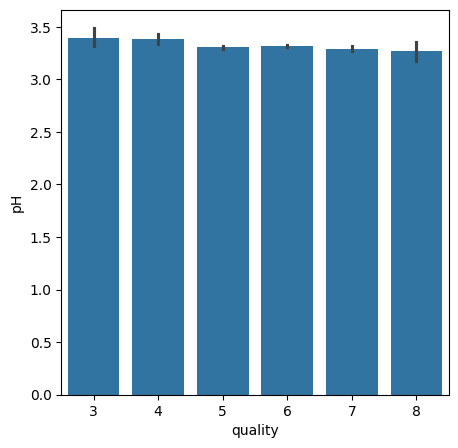

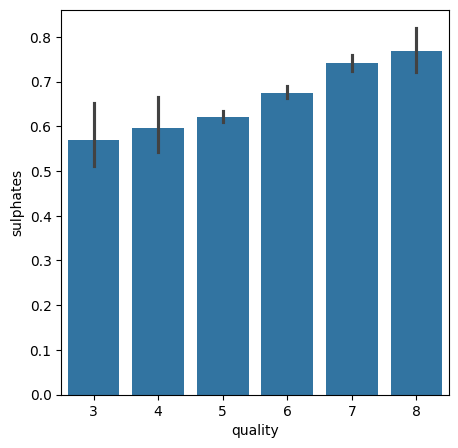

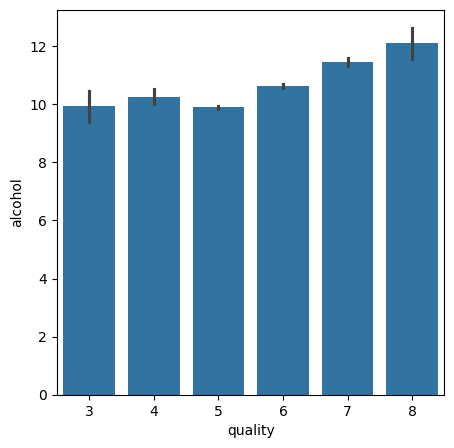

In [14]:
for column in wine_dataset.columns:
  if column != 'quality':
    plt.figure(figsize=(5,5))
    sns.barplot(x = 'quality', y = column, data = wine_dataset)

<Axes: >

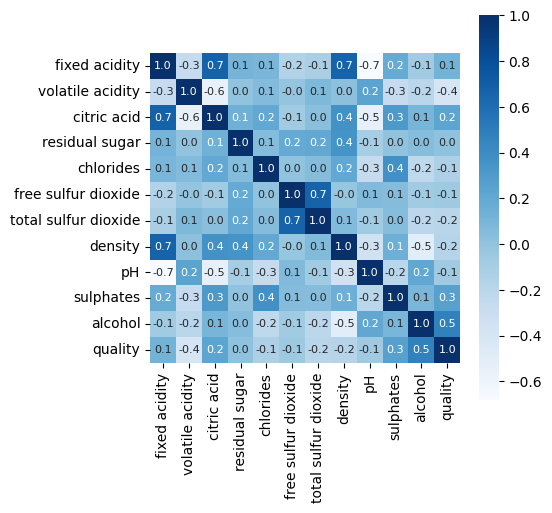

In [19]:
# correlation between the dataset features.
correlation = wine_dataset.corr()

#Constructing a heatmap for the understanding of the correlation.
plt.figure(figsize=(5, 5))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size':8}, cmap='Blues')

Data Preprocessing.

In [18]:
#Separating Data Labels.
X = wine_dataset.drop('quality', axis = 1)

# Label Binarization.
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value >= 7 else 0)

In [20]:
# Splitting the data into training and testing data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [24]:
print(X_train.shape, X_test.shape)

(1279, 11) (320, 11)


In [21]:
#Creating an instance of the classifier.
classifier = RandomForestClassifier()

In [25]:
#Model training.
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [26]:
# Evaluation for Training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy: ', training_data_accuracy)

Accuracy:  1.0


In [27]:
# Evaluation for testing data
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy: ', testing_data_accuracy)

Accuracy:  0.921875


Further we can make a predictive system using this classifier.